In [1]:
%matplotlib inline
from pylab import *

import os
if not os.path.exists("output/") : os.mkdir("output/")
if not os.path.exists("data/") : os.mkdir("data/")

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [4]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [5]:
X_train.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X_train)

degree_list = [1,3,5]
model_score_list = []

for degree in degree_list:
  poly = PolynomialFeatures(degree=degree)
  X_poly = poly.fit_transform(X_std)
  X_train_poly, X_valid_poly, Y_train, Y_valid = train_test_split(X_poly, y_train, test_size=0.3, random_state=0)

  model = LogisticRegression()
  model.fit(X_train_poly, Y_train)
  Y_pred_train = model.predict_proba(X_train_poly)
  Y_pred_valid = model.predict_proba(X_valid_poly)
  loss_train = log_loss(Y_train, Y_pred_train)
  loss_valid = log_loss(Y_valid, Y_pred_valid)
  print(f'degree = {degree},train loss:{loss_train},valid loss:{loss_valid}')
  model_score_list.append((degree, loss_train, loss_valid))
model_score_list = sorted(model_score_list, key=lambda x:x[2])
print(f'best model:degree = {model_score_list[0][0]}')

degree = 1,train loss:0.6618462660709911,valid loss:0.6622415029533725
degree = 3,train loss:0.6512364788478353,valid loss:0.6564764911127249
degree = 5,train loss:0.6750872966229771,valid loss:0.6775978872727052
best model:degree = 3


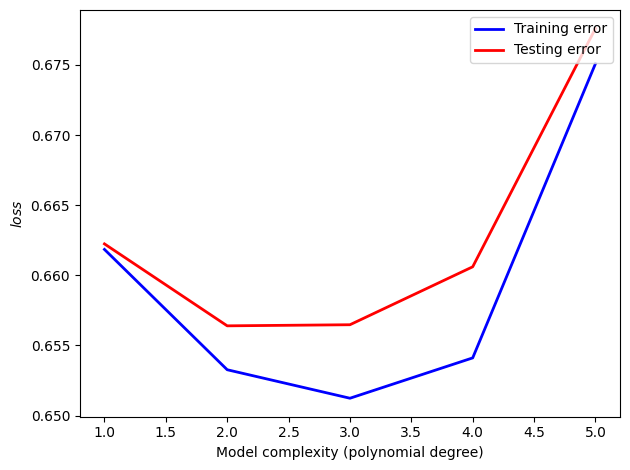

In [9]:
from sklearn.metrics import mean_squared_error

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X_train)

loss_train = []
loss_test = []

max_degree = 6

for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_std)
    X_train_poly, X_valid_poly, Y_train, Y_valid = train_test_split(X_poly, y_train, test_size=0.3, random_state=0)
    
    regr = LogisticRegression()
    regr = regr.fit(X_train_poly, Y_train)
    y_train_pred = regr.predict_proba(X_train_poly)
    y_valid_pred = regr.predict_proba(X_valid_poly)
    
    loss_train.append(log_loss(Y_train, y_train_pred))
    loss_test.append(log_loss(Y_valid, y_valid_pred))
    

plt.plot(range(1, max_degree), loss_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), loss_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$loss$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()

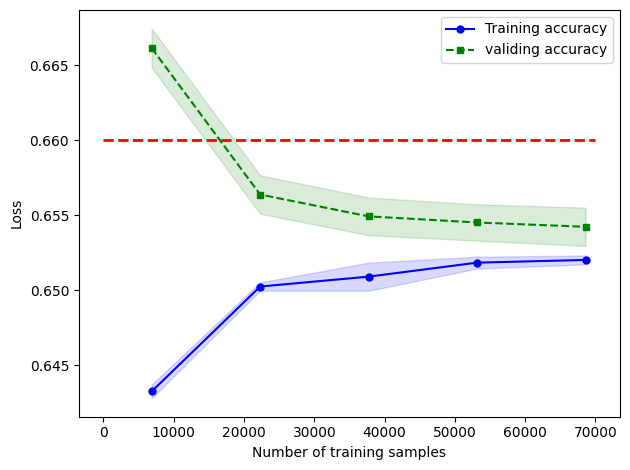

In [11]:
def loss(model, X, y):
  return log_loss(y, model.predict_proba(X))
from sklearn.model_selection import learning_curve
degree = 3
model = LogisticRegression()
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_std)
train_sizes, train_scores, valid_scores = learning_curve(estimator=model, X=X_poly, y=y_train, scoring=loss)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)
plt.plot(train_sizes, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='Training accuracy')
plt.fill_between(train_sizes,
        train_mean+train_std,
        train_mean-train_std,
        alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validing accuracy')
plt.fill_between(train_sizes,
        valid_mean+valid_std,
        valid_mean-valid_std,
        alpha=0.15, color='green')
plt.hlines(y=0.66, xmin=0, xmax=70000, color='red', linewidth=2, linestyle='--')

plt.xlabel('Number of training samples')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

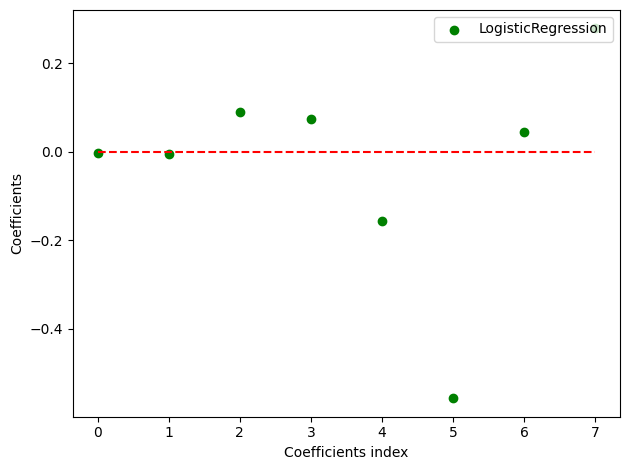

best 3 features:['SHOT_DIST', 'CLOSE_DEF_DIST', 'TOUCH_TIME']


In [12]:
model_for_select = LogisticRegression()
x_train_for_select, x_valid_for_select, Y_train_for_select, Y_valid_for_select = train_test_split(X_std, y_train, test_size=0.3, random_state=0)
model_for_select.fit(x_train_for_select, Y_train_for_select)
var_num = X_train.shape[1]
plt.scatter(range(var_num),model_for_select.coef_, label = 'LogisticRegression', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

feature_list = []

for i,feature in enumerate(X_train.columns.values):
  feature_list.append((feature, model_for_select.coef_[0][i], i))
feature_list = sorted(feature_list, key=lambda x:abs(x[1]), reverse=True)
index_list = [feature[2] for feature in feature_list[:3]]
print(f'best 3 features:{[feature[0] for feature in feature_list[:3]]}')

In [13]:
model = LogisticRegression()
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_std[:,index_list])
x_train, x_valid, Y_train, Y_valid = train_test_split(X_poly, y_train, test_size=0.3, random_state=0)
model.fit(x_train, Y_train)
Y_pred_train = model.predict_proba(x_train)
Y_pred_valid = model.predict_proba(x_valid)
loss_train = log_loss(Y_train, Y_pred_train)
loss_valid = log_loss(Y_valid, Y_pred_valid)
print(f'train loss:{loss_train},valid loss:{loss_valid}')

train loss:0.6542451963103953,valid loss:0.6564529072973551


In [14]:
Y_test = model.predict(poly.fit_transform(sc_x.transform(X_test)[:,index_list]))
data = {
    'FGM': Y_test
}
pd.DataFrame(data).to_csv('output/Lab05_110062209_y_pred.csv', index=False)

我以LogisticRegression為基礎，測試不同degree(1,3,5)

先用StandardScaler對資料做前處理，loss用log_loss計算(取model的predict_proba與true value比較)

degree=3時model表現最好，且不會overfit

接著我用degree=1的LogisticRegression測試每個features的coefficient，並取coefficient絕對值最高的三個feature當所需feature